In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import xspec as x

!ls

figures			 __pycache__		     tables
hmf_clusters.ipynb	 README.md		     utils
merge_photons.ipynb	 scaling_relations.ipynb     xspec_table_models.py
model_atable_19787.fits  spectra_from_photons.ipynb
newLogFile.txt		 spectra_magneticum.ipynb


# AGNs

In [2]:
data_name = "../data/eROSITA_cluster_agn_box2hr/agn_092.dat"
headers1 = ["ID", 
            "x [kpc/h]", 
            "y [kpc/h]", 
            "z[kpc/h]", 
            "M [Msol]", 
            "Mdot [Msol/year]", 
            "Lbol [erg/s]", 
            "Lsoftx [erg/s]", 
            "Lhard [erg/s]", 
            "f_obs"]
table1 = pd.read_csv(data_name, comment='#', header=None, sep='\s+', names=headers1)
table1

,ID,x [kpc/h],y [kpc/h],z[kpc/h],M [Msol],Mdot [Msol/year],Lbol [erg/s],Lsoftx [erg/s],Lhard [erg/s],f_obs
0,0,240134.23000,278604.62,216048.58,39442900.0,0.000095,5.980697e+41,5.099707e+40,7.828258e+40,1.000000
1,1,238934.14000,278966.09,216201.14,132927000.0,0.000101,6.380837e+41,5.418299e+40,8.306542e+40,1.000000
2,2,238487.81000,278987.03,216040.61,79275000.0,0.000214,1.352523e+42,1.086058e+41,1.640156e+41,1.000000
3,3,237887.23000,277908.97,216132.50,67656000.0,0.000628,3.964621e+42,2.871005e+41,4.243506e+41,0.935222
4,4,236814.19000,278410.41,216421.95,101353000.0,0.000999,6.303717e+42,4.331131e+41,6.342556e+41,0.885045
...,...,...,...,...,...,...,...,...,...,...
362237,390241,1199.33250,148509.62,158785.95,137284000.0,0.000207,1.307974e+42,1.053215e+41,1.591622e+41,1.000000
362238,390243,918.27228,147657.55,160155.78,135256000.0,0.000421,2.658653e+42,2.006838e+41,2.990020e+41,0.978924
362239,390244,800.08716,146986.00,160445.52,114989000.0,0.000192,1.212590e+42,9.824784e+40,1.486975e+41,1.000000
362240,390245,9111.28420,152372.50,155277.52,82102500.0,0.000296,1.869630e+42,1.459404e+41,2.189755e+41,1.000000


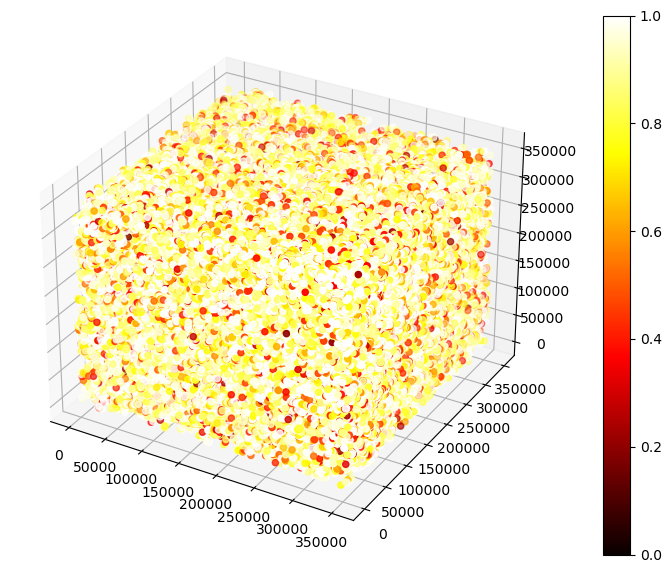

In [3]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table1.to_numpy().astype(float)

x = data_table[:,1]
y = data_table[:,2]
z = data_table[:,3]
c = data_table[:,9]

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# CLUSTERS

In [4]:
data_name = "../data/eROSITA_cluster_agn_box2hr/cluster_132.dat"
headers2 = ["ID",
            "x [kpc/h]", 
            "y [kpc/h]",
            "z[kpc/h]",
            "Mvir [Msol/h]", 
            "M200m [Msol/h]",
            "M500m [Msol/h]", 
            "M200c [Msol/h]", 
            "M500c [Msol/h]", 
            "R500c [kpc/h]",
            "Mgas_500c [Msol/h]",  
            "Mstar_500c [msol/h]", 
            "T_500c [keV]",
            "Lx_500c [1e44 erg/s]"]
  
table2 = pd.read_csv(data_name, comment='#', sep='\s+', header=None, names=headers2)
table2

,ID,x [kpc/h],y [kpc/h],z[kpc/h],Mvir [Msol/h],M200m [Msol/h],M500m [Msol/h],M200c [Msol/h],M500c [Msol/h],R500c [kpc/h],Mgas_500c [Msol/h],Mstar_500c [msol/h],T_500c [keV],Lx_500c [1e44 erg/s]
0,0,208891.690,203958.620,349892.88000,1.738140e+15,2.021330e+15,1.516980e+15,1.438000e+15,1.054300e+15,1304.380,1.318770e+14,2.998840e+13,9.29729,29.479800
1,1,314185.560,24381.910,278254.47000,1.127560e+15,1.344800e+15,8.751310e+14,7.910120e+14,5.044550e+14,1020.190,5.791310e+13,1.560080e+13,5.69545,9.152350
2,2,84017.359,206627.810,144274.66000,1.101270e+15,1.186380e+15,9.515290e+14,8.766240e+14,3.810850e+14,929.175,4.339390e+13,9.335110e+12,4.78528,3.289330
3,3,327294.590,233081.580,209418.19000,1.037810e+15,1.184210e+15,9.023160e+14,8.475580e+14,5.879100e+14,1073.610,6.818270e+13,1.638090e+13,6.07371,9.439100
4,4,335834.410,215561.000,165794.41000,8.144640e+14,1.016070e+15,5.447330e+14,4.638390e+14,1.836670e+14,728.500,1.553420e+13,6.184820e+12,4.00095,0.785152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,1096,44210.355,83982.109,537.27722,8.385340e+13,9.219210e+13,7.523490e+13,7.122440e+13,5.026010e+13,472.954,3.635450e+12,1.627940e+12,1.31603,0.107444
744,1123,191556.660,330400.750,149113.78000,7.982780e+13,8.634050e+13,7.451750e+13,7.185780e+13,5.252190e+13,479.944,3.408890e+12,1.765010e+12,1.46880,0.094985
745,1152,58259.348,280274.410,138237.83000,8.234710e+13,8.642110e+13,7.717260e+13,7.434800e+13,5.818130e+13,496.598,5.023010e+12,1.538290e+12,1.38228,0.217171
746,1160,141148.060,94753.555,118348.42000,7.744770e+13,8.733370e+13,6.991900e+13,6.713900e+13,5.087910e+13,474.886,3.912940e+12,1.379830e+12,1.26342,0.122740


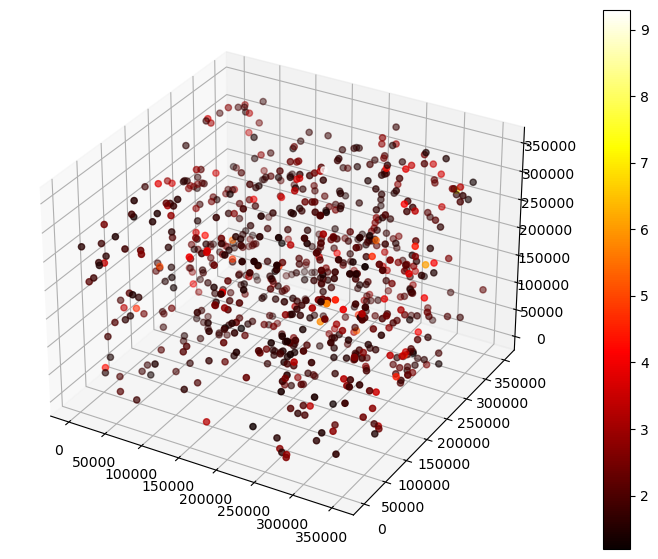

In [5]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table2.to_numpy().astype(float)

x = data_table[:,1]
y = data_table[:,2]
z = data_table[:,3]
c = data_table[:,12]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# SCALING RELATIONS

Let's check whether parameters of these clusters satisfy scaling relations from Churazov et al. (2015):

z = 0.1011429

<Figure size 640x480 with 0 Axes>

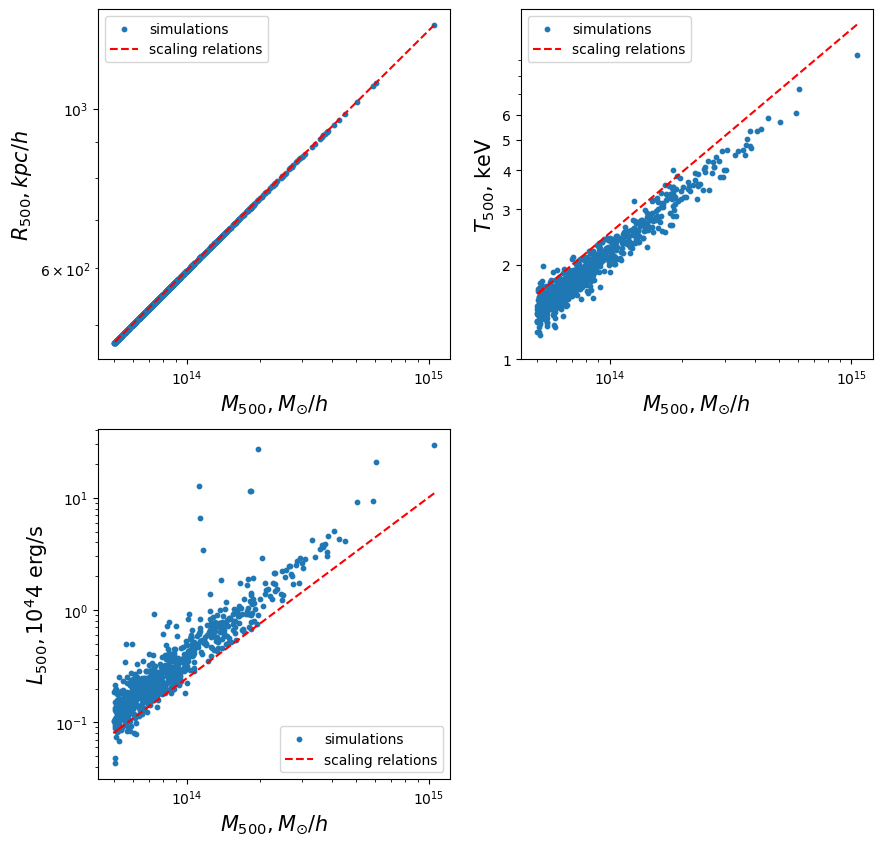

In [6]:
%run -i 'utils/functions.py'

plt.figure(figsize=(10, 10))

M500s = table2["M500c [Msol/h]"]
R500s = table2["R500c [kpc/h]"]
T500s = table2["T_500c [keV]"]
L500s = table2["Lx_500c [1e44 erg/s]"]

zzz = [0.1011429]*len(M500s)
R500s_rel = R500(M500s, zzz)
T500s_rel = T_X(M500s, zzz)
L500s_rel = L_X(M500s, zzz, 0.704)

plt.subplot(221)
plt.scatter(M500s, R500s, s=10, label = 'simulations')
plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$R_{500}, kpc/h$", fontsize=15)
plt.legend()

plt.subplot(222)
plt.scatter(M500s, T500s, s=10, label = 'simulations')
plt.plot(M500s, T500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.yticks([1,2,3,4,5,6], [1,2,3,4,5,6])
plt.legend()

plt.subplot(223)
plt.scatter(M500s, L500s, s=10, label = 'simulations')
plt.plot(M500s, L500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$L_{500}, 10^44$ erg/s", fontsize=15)
plt.legend()

plt.show()

## ... and from 5x5 field adjusted for different $z$:

In [13]:
spisok0 = pd.read_csv("../data/eROSITA_5.0x5.0/Catalouges/cluster.dat", sep='\s+')
spisok1 = spisok0[spisok0["M500"]>1e14]
spisok2 = spisok1[spisok1["z_true"]>0.02]
spisok = spisok2[spisok2["z_true"]<0.9]
spisok

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
55915,8,0.477773,0.905290,0.152051,0.007891,2.260120e+14,0.881625,0.881279,1.592210e+14,898.173,5.779340e+12,1.714970e+13,3.80963,8.705920,0.000009,2.110860e+14,1339.20,0
59465,25,0.507521,0.545246,0.268085,0.007974,2.014060e+14,0.828964,0.829204,1.202700e+14,810.418,3.673890e+12,1.262370e+13,3.09033,3.432240,0.000006,1.899640e+14,1280.94,0
60278,56,0.940982,0.330081,0.510556,0.007392,1.604510e+14,0.843258,0.842559,1.029880e+14,769.577,3.957450e+12,1.033180e+13,2.96683,13.207400,0.000006,1.442230e+14,1168.57,0
60679,1,0.889274,0.210127,0.633906,0.010892,5.133600e+14,0.850574,0.850093,3.055520e+14,1105.840,9.900450e+12,3.168630e+13,4.72281,6.564810,0.000013,4.745990e+14,1738.12,0
61946,65,0.625054,0.409478,0.057728,0.007736,1.574460e+14,0.759249,0.758559,1.042120e+14,764.938,4.066400e+12,1.055240e+13,3.07166,22.488900,0.000006,1.445440e+14,1157.84,0
62308,1,0.569552,0.283180,0.180889,0.011669,5.403810e+14,0.766220,0.765866,3.641040e+14,1160.770,1.071910e+13,3.946750e+13,5.76753,14.299200,0.000017,5.029460e+14,1754.47,0
62969,23,0.869501,0.594314,0.392228,0.008305,1.947960e+14,0.778245,0.778153,1.365710e+14,837.088,6.109920e+12,1.216420e+13,3.31890,1.734020,0.000006,1.821550e+14,1250.58,0
63559,17,0.297899,0.714803,0.590043,0.008942,2.431550e+14,0.789576,0.789184,1.585800e+14,879.858,5.939130e+12,1.681120e+13,3.48448,2.904620,0.000008,2.235460e+14,1338.97,0
64222,62,0.903609,0.006148,0.843746,0.007781,1.602200e+14,0.804217,0.805013,1.022800e+14,760.193,3.739180e+12,1.010730e+13,2.48060,1.388850,0.000004,1.434420e+14,1154.89,0
64564,10,0.775554,0.603950,0.962853,0.009344,2.774520e+14,0.811133,0.810773,1.943820e+14,941.606,6.366700e+12,2.044320e+13,4.08521,12.560500,0.000010,2.545480e+14,1398.18,0


In [14]:
max(spisok["z_true"])

0.88162473

In [15]:
#spisok.sort_values("M500", inplace=True)
spisok.sort_values("M500", inplace=False)
spisok

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
55915,8,0.477773,0.905290,0.152051,0.007891,2.260120e+14,0.881625,0.881279,1.592210e+14,898.173,5.779340e+12,1.714970e+13,3.80963,8.705920,0.000009,2.110860e+14,1339.20,0
59465,25,0.507521,0.545246,0.268085,0.007974,2.014060e+14,0.828964,0.829204,1.202700e+14,810.418,3.673890e+12,1.262370e+13,3.09033,3.432240,0.000006,1.899640e+14,1280.94,0
60278,56,0.940982,0.330081,0.510556,0.007392,1.604510e+14,0.843258,0.842559,1.029880e+14,769.577,3.957450e+12,1.033180e+13,2.96683,13.207400,0.000006,1.442230e+14,1168.57,0
60679,1,0.889274,0.210127,0.633906,0.010892,5.133600e+14,0.850574,0.850093,3.055520e+14,1105.840,9.900450e+12,3.168630e+13,4.72281,6.564810,0.000013,4.745990e+14,1738.12,0
61946,65,0.625054,0.409478,0.057728,0.007736,1.574460e+14,0.759249,0.758559,1.042120e+14,764.938,4.066400e+12,1.055240e+13,3.07166,22.488900,0.000006,1.445440e+14,1157.84,0
62308,1,0.569552,0.283180,0.180889,0.011669,5.403810e+14,0.766220,0.765866,3.641040e+14,1160.770,1.071910e+13,3.946750e+13,5.76753,14.299200,0.000017,5.029460e+14,1754.47,0
62969,23,0.869501,0.594314,0.392228,0.008305,1.947960e+14,0.778245,0.778153,1.365710e+14,837.088,6.109920e+12,1.216420e+13,3.31890,1.734020,0.000006,1.821550e+14,1250.58,0
63559,17,0.297899,0.714803,0.590043,0.008942,2.431550e+14,0.789576,0.789184,1.585800e+14,879.858,5.939130e+12,1.681120e+13,3.48448,2.904620,0.000008,2.235460e+14,1338.97,0
64222,62,0.903609,0.006148,0.843746,0.007781,1.602200e+14,0.804217,0.805013,1.022800e+14,760.193,3.739180e+12,1.010730e+13,2.48060,1.388850,0.000004,1.434420e+14,1154.89,0
64564,10,0.775554,0.603950,0.962853,0.009344,2.774520e+14,0.811133,0.810773,1.943820e+14,941.606,6.366700e+12,2.044320e+13,4.08521,12.560500,0.000010,2.545480e+14,1398.18,0


In [16]:
np.mean(T500s), np.mean(M500s)/10**14

(3.1850571428571435, 1.6072132653061224)

<Figure size 640x480 with 0 Axes>

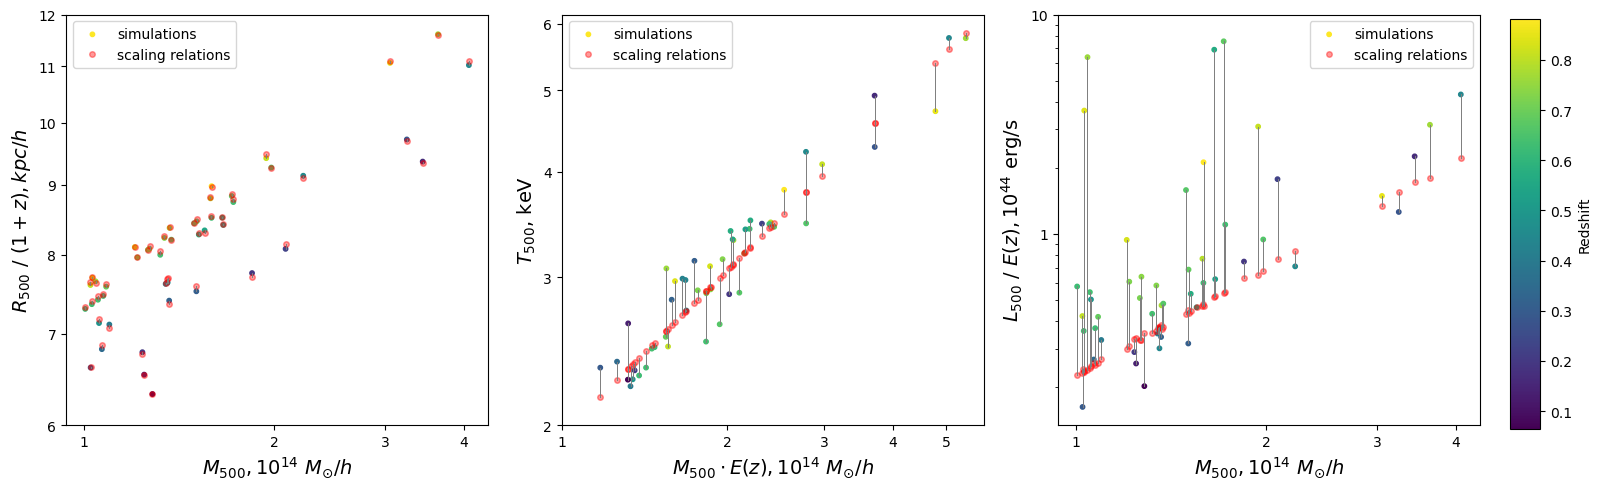

In [41]:
%run -i 'utils/functions.py'

M500s = spisok["M500"].values
R500s = spisok["R500"].values
T500s = spisok["T500"].values
L500s = spisok["Lx500"].values
zs = spisok["z_true"].values

L500s_05_20 = np.zeros(len(M500s))
for i in range(len(M500s)):
    L500s_05_20[i] = L_X_from_T(T500s[i], 0.3, zs[i], L500s[i])

R500s_rel = R500(M500s, zs)
T500s_rel = T_X(M500s, zs)
L500s_rel = L_X(M500s, zs, 0.704)

plt.figure(figsize=(15, 5))

plt.subplot(131, aspect='auto')
draw_panel(M500s, R500s, R500s_rel)
plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$R_{500} \ / \ (1+z), kpc/h$", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
plt.yticks([g*100 for g in [6,7,8,9,10,11,12]], [6,7,8,9,10,11,12])

plt.subplot(132, aspect='auto')
draw_panel(M500s*E(zs), T500s, T500s_rel)
plt.xlabel("$M_{500} \cdot E(z), 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$T_{500}$, keV", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
plt.yticks([2,3,4,5,6], [2,3,4,5,6])
#T500s_rel2 = T_X(M500s, zs, mean_T=3.18, mean_M=1.6)
#plt.plot(M500s*E(zs), T500s_rel2, color='dodgerblue', linewidth=0, marker='o', markersize=4, 
#         alpha=0.4, linestyle='--', label = 'sc.rel. w/ different <M> and <T>')
#plt.legend()

plt.subplot(133, aspect='auto')
#draw_panel(M500s, L500s, L0520s_rel)
draw_panel(M500s, L500s_05_20/E(zs), L500s_rel/E(zs))
plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$L_{500} \ / \ E(z), 10^{44}$ erg/s", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
plt.yticks([1, 10], [1, 10])

#plt.subplots_adjust(right=0.96)
plt.tight_layout()
plt.colorbar(cax = plt.axes([1.01, 0.13, 0.02, 0.82]), label='Redshift')

plt.savefig('figures/sc_rel.png', format='png')
plt.show()

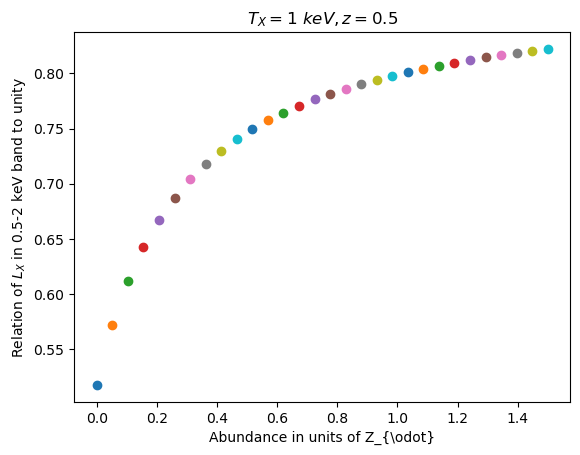

In [37]:
%run -i 'utils/functions.py'

for abunds in np.linspace(0, 1.5, 30):
    plt.scatter(abunds, L_X_from_T(1, abunds, 0.5, 1))
    
plt.title("$T_X = 1 \ keV, z = 0.5$")
plt.xlabel("Abundance in units of Z_{\odot}")
plt.ylabel("Relation of $L_X$ in 0.5-2 keV band to unity")

plt.show()